# Protein Exploration Notebook

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Load Datasets

In [2]:
#Load Datasets

protein_df = pd.read_csv('../data/raw/ProteinAndPathologyQuantifications.csv')
Donor_df = pd.read_csv('../data/raw/DonorInformation.csv')
Stains_df = pd.read_csv('../data/raw/DescriptionOfStains.csv')
gene_expression_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_normalized.csv')
gene_expression_unnormalized_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_unnormalized.csv')
columns_samples_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/columns-samples.csv')
rows_genes_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')



In [3]:
# Create df of donors ids and corresponding diagnosis, this will be used to map to the proteins data samples
donor_labels_df = Donor_df[['donor_id','act_demented']]

In [4]:
donor_labels_df

,donor_id,act_demented
0,326765665,No Dementia
1,326765656,No Dementia
2,326765654,Dementia
3,467056391,No Dementia
4,309335447,Dementia
...,...,...
102,309335458,Dementia
103,309335462,Dementia
104,309335454,No Dementia
105,309335486,No Dementia


In [5]:
# Map donor_labels_df to protein_df so each sample will be associated with the appropriate diagnosis 
donor_labels_dict = donor_labels_df.set_index('donor_id')['act_demented'].to_dict()
protein_df['dementia_status'] = protein_df['donor_id'].map(donor_labels_dict)

In [6]:
#Examine protein_df to ensure labels properly populated
protein_df

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,326765653,H14.09.066,10208,PCx,0.000046,0.001989,0.000533,0.000082,0.001130,0.003128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


In [7]:
#Check the distribution of Dementia in Protein samples dataset
print('No Dementia: ', len(protein_df[protein_df['dementia_status']=='No Dementia']))
print('Dementia: ', len(protein_df[protein_df['dementia_status']=='Dementia']))

No Dementia:  197
Dementia:  180


# Handling Missing Data

In [8]:
#check for Nan
total_nan_count = protein_df.isna().sum()


In [9]:
#total_nan_count

In [10]:
# Process dataframe by Dropping Nan
# - drop isoprostane_pg_per_mg because missing most of the data (63% of samples missing isoprostane data)
# - dropna for remaining columns (will still represent >70% of the samples)

protein_df_drop_cleaned = protein_df.drop('isoprostane_pg_per_mg',axis=1)
protein_df_drop_cleaned.dropna(inplace = True)

In [11]:
# Check for Nan after cleaning
total_nan_count = protein_df_drop_cleaned.isna().sum()
#total_nan_count

In [12]:
# protein_df_drop_cleaned has samples with corresponding dementia labels and no missing values. 
# Represents total of 279 samples from original 377 samples (74%)
# Dropping missing values was the strategy choosen since biological systems are complex and variability between
# individuals could be significant. Filling missing values through imputation could potentially skew the data.

In [13]:
# Protein groups
# There are 28 different protein measures, however there are only 14 distinct proteins. 
# Some measures are different methods of measuring the same protein, for example ihc_a_syn is measuring the 
# stain area coverage for α-synuclein, while a_syn_pg_per_mg is measuring the concentration of a_syn_pg_per_mg

# Amyloid: ihc_a_beta, ab42_over_ab40_ratio, ihc_a_beta_ffpe, ab42_pg_per_mg, ab40_pg_per_mg
# α-synuclein:ihc_a_syn, a_syn_pg_per_mg
# interferon: ifn_g_pg_per_mg
# RANTES: rantes_pg_per_mg
# Tau: ihc_tau2_ffpe, ptau_over_tau_ratio, ptau_ng_per_mg, ihc_at8, ihc_at8_ffpe, tau_ng_per_mg
# Isoprostane: isoprostane_pg_per_mg
# BDNF: bdnf_pg_per_mg
# MIP-1a: mip_1a_pg_per_mg
# Interleukins: il_4_pg_per_mg, il_1b_pg_per_mg, il_7_pg_per_mg, il_6_pg_per_mg, il_10_pg_per_mg
# MCP-1: mcp_1_pg_per_mg
# IBA-1: ihc_iba1_ffpe
# phospho-TDP43: ihc_ptdp_43_ffpe
# GFAP:ihc_gfap_ffpe
# TNF: Tumor Necrosis Factor alpha

In [14]:
#View list of columns
columns = protein_df_drop_cleaned.columns
columns

Index(['donor_id', 'donor_name', 'structure_id', 'structure_acronym',
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg', 'dementia_status'],
      dtype='object')

In [15]:
# columns to keep for training
# dropping catergorical columns as well as donor_id/donor_name and dementia status

columns_keep_for_training = [
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg']

In [16]:
protein_df_drop_cleaned

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,326765668,H14.09.081,10294,HIP,0.000122,0.006376,0.026056,0.025917,0.001646,0.009597,...,4.56,5.170612,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,No Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


# Custom Functions

In [17]:
# Adapted from functions created by Camaron Mangham
def train_models(models, model_names, X_train, y_train, X_val, y_val):
    score_names = ['accuracy',
                   'precision',
                   'recall',
                   'f1',
                    #   'roc_auc'
                      ]
    scores = []
    for name, model in zip(model_names, models):
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        accuracy_scores = accuracy_score(y_val, preds)
        precision_scores = precision_score(y_val, preds)
        recall_scores = recall_score(y_val, preds)
        f1_scores = f1_score(y_val,preds)
        # roc_auc_scores = roc_auc_score(y_val,preds)

        scores.append([accuracy_scores,
                       precision_scores,
                       recall_scores,
                       f1_scores,
                        # roc_auc_scores
                        ])

    model_scores = pd.DataFrame(scores, index= model_names, columns= score_names)

    return model_scores

In [18]:
def custom_train_test_split(protein_df ,donor_ids):
    # 70, 30 Train, Test split
    # np.random.seed(42)
    train_ids, test_ids = train_test_split(donor_ids, test_size=0.30)
    # print(len(train_ids), len(test_ids))

    #samples (rna_profile_ids) by donor data splt
    train_df = protein_df[protein_df['donor_id'].isin(train_ids)].drop(columns='donor_id')
    test_df = protein_df[protein_df['donor_id'].isin(test_ids)].drop(columns='donor_id')

    # final data prep
    X_train = train_df.drop(columns='dementia_status')
    y_train = train_df['dementia_status']

    X_test = test_df.drop(columns='dementia_status')
    y_test = test_df['dementia_status']

    # Scale data and transform data
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    y_train = y_train.apply(lambda x: 1 if x == 'Dementia' else 0)
    y_test = y_test.apply(lambda x: 1 if  x=='Dementia' else 0)


    return X_train, y_train, X_test, y_test

In [19]:
def train_models_boot_data(protein_df,donor_ids, models, model_names, iterations=1000):
    score_names = ['Accuracy',
                   'Precision',
                   'Recall',
                   'F1',
                      ]
    scores_accuracy = []
    scores_precision = []
    scores_recall = []
    scores_f1 = []
    for i in range(iterations + 1):
        X_train, y_train, X_test, y_test = custom_train_test_split(protein_df,donor_ids)
        scores_accuracy_i = []
        scores_precision_i = []
        scores_recall_i = []
        scores_f1_i = []
        for name, model in zip(model_names, models):
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

            scores_accuracy_i.append(accuracy_score(y_test, preds))
            scores_precision_i.append(precision_score(y_test, preds))
            scores_recall_i.append(recall_score(y_test, preds))
            scores_f1_i.append(f1_score(y_test,preds))

        scores_accuracy.append(scores_accuracy_i)
        scores_precision.append(scores_precision_i)
        scores_recall.append(scores_recall_i)
        scores_f1.append(scores_f1_i)

    scores_list = [scores_accuracy, scores_precision, scores_recall, scores_f1]
    model_scores_dict = {}
    for name, scores in zip(score_names, scores_list):
        model_scores_dict[name] = pd.DataFrame(scores, columns= model_names)

    return model_scores_dict

In [20]:
def subplot_plot_model_scores(model_scores, protein_df, score_name, ax=None):
    sort_order = np.argsort(model_scores.mean().values)
    descending_sort = sort_order[::-1]
    sorted_labels = model_scores.iloc[:, descending_sort].columns

    # Use the provided subplot or create a new one
    if ax is None:
        plt.figure(figsize=(10, 6))
        ax = plt.gca()

    sns.boxplot(model_scores.iloc[:, descending_sort], orient='h', palette='Spectral', ax=ax)
    y_labels = sorted_labels
    ax.set_yticks(range(len(y_labels)))
    ax.set_yticklabels(y_labels)
    ax.set_xlabel(f'{score_name} Score')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axvline(0.5,color="gray",linestyle="--")

In [21]:
# Using nan dropped data

donor_ids = list(protein_df_drop_cleaned['donor_id'].unique())
protein_df = protein_df_drop_cleaned.drop(columns = ['donor_name', 'structure_id','structure_acronym'])

#protein_df

# PCA

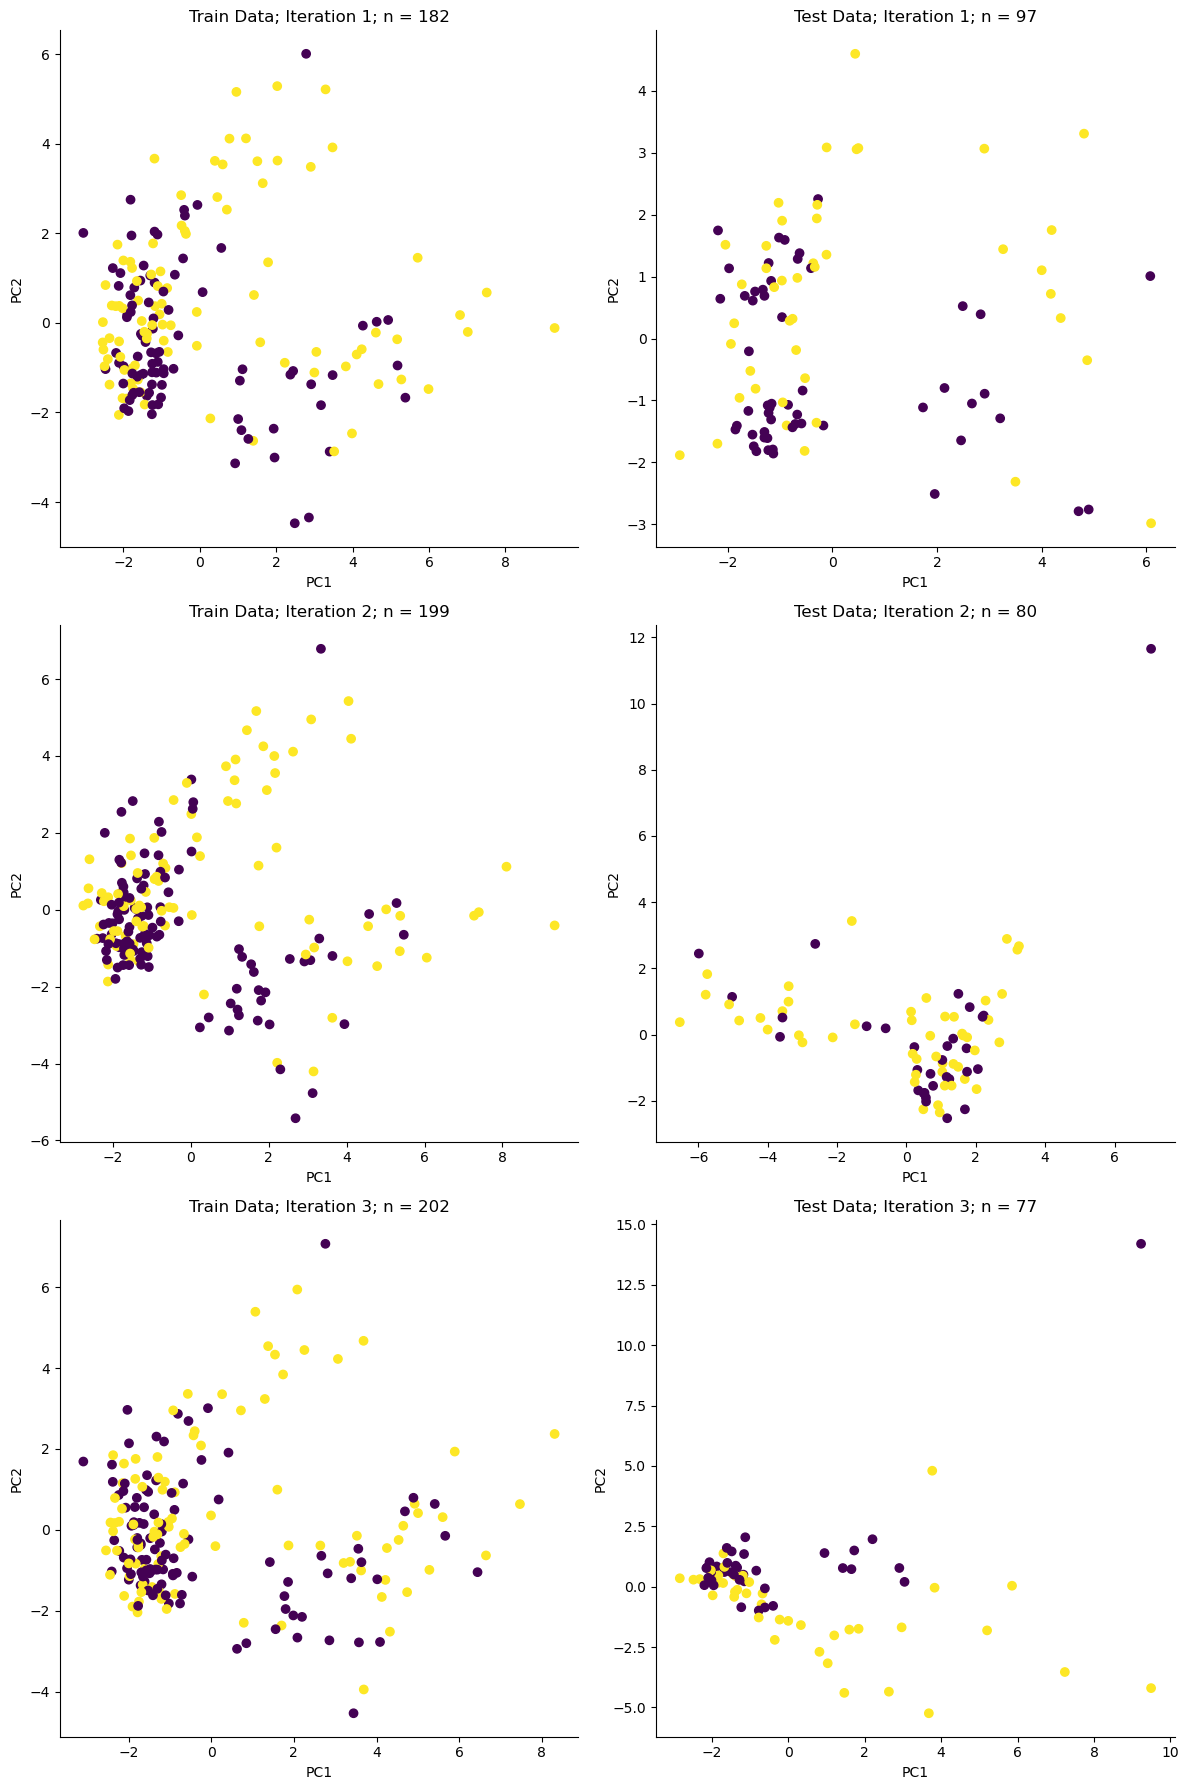

In [22]:
# Function created by Camaron Mangham
# Prep PCA
pca = PCA(n_components=2, random_state=42)

# Set the size of the plots and create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows, 2 columns

for i in range(1, 4):
    X_train, y_train, X_test, y_test = custom_train_test_split(protein_df, donor_ids)
    # Plot for Train Data
    X_train_pca = pca.fit_transform(X_train)
    axes[i - 1, 0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, label=y_train)
    axes[i - 1, 0].set_xlabel('PC1')
    axes[i - 1, 0].set_ylabel('PC2')
    axes[i - 1, 0].set_title(f'Train Data; Iteration {i}; n = {X_train.shape[0]}')
    axes[i - 1, 0].spines['top'].set_visible(False)
    axes[i - 1, 0].spines['right'].set_visible(False)

    # Plot for Test Data
    X_test_pca = pca.fit_transform(X_test)
    axes[i - 1, 1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, label=y_test)
    axes[i - 1, 1].set_xlabel('PC1')
    axes[i - 1, 1].set_ylabel('PC2')
    axes[i - 1, 1].set_title(f'Test Data; Iteration {i}; n = {X_test.shape[0]}')
    axes[i - 1, 1].spines['top'].set_visible(False)
    axes[i - 1, 1].spines['right'].set_visible(False)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

# Bootstrapping

In [23]:
# Define models to test
# Code from Camaron Mangham

models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(kernel="linear", random_state=42),
    SVC(kernel="rbf", random_state=42),
    GaussianNB(),
    GradientBoostingClassifier(random_state=42),
    # DummyClassifier(strategy="most_frequent", random_state=42),
]

# List of model_names for output
model_names = [
    "Log_Reg",
    "DT",
    "RF",
    "SVM_linear",
    "SVM_radial",
    "GaussianNB",
    "Gradient_boosted",
    # "Dummy_most_freq",
]

In [24]:
model_scores_dict = train_models_boot_data(protein_df,donor_ids, models, model_names, iterations= 1000)


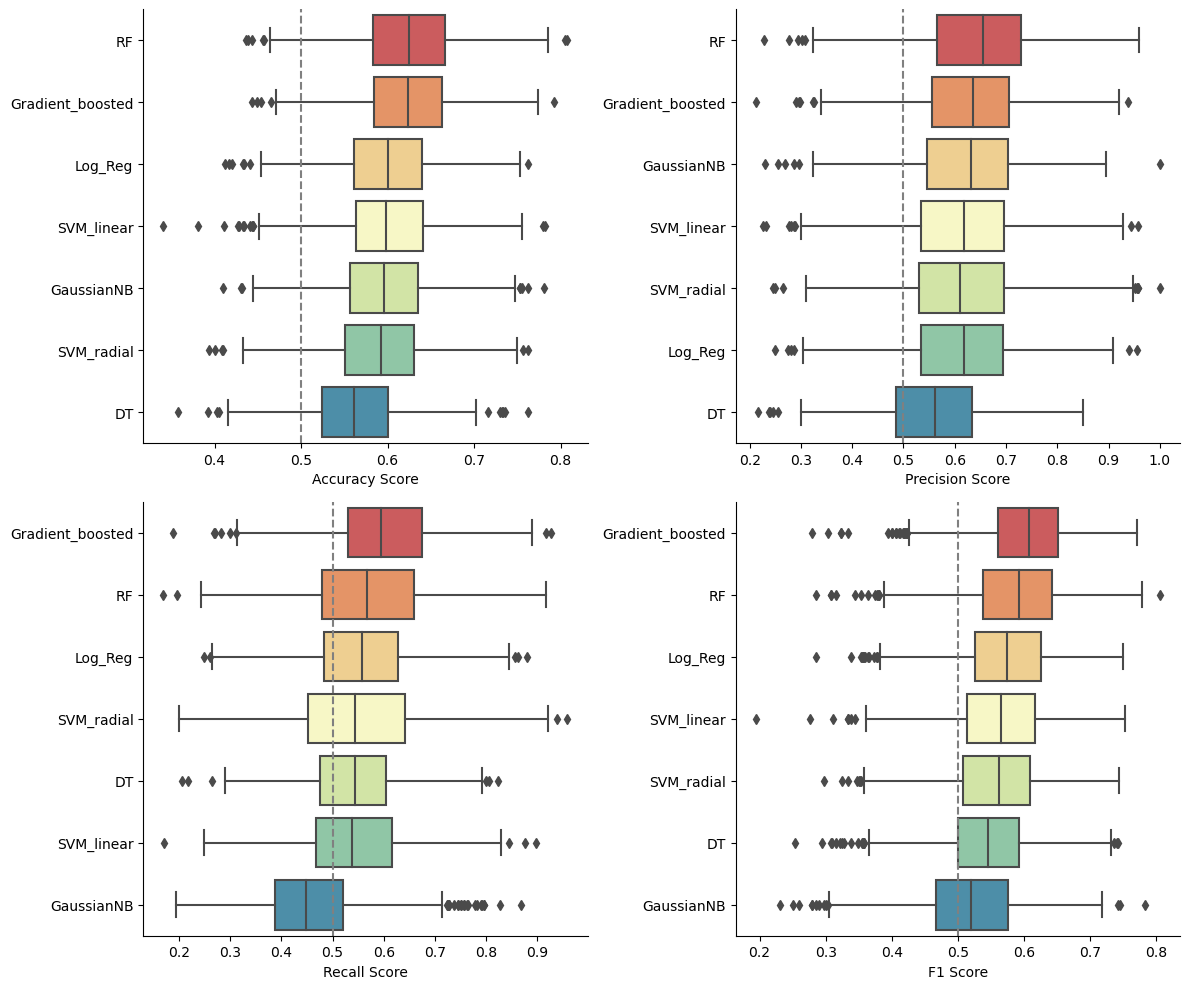

In [25]:
### PLOT
# Code from Camaron Mangham

# # Assuming metrics is defined as before
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through the metrics and plot on the corresponding subplot
for i, metric in enumerate(metrics):
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot

    # model_scores = train_models_boot_data(ml_df,donor_ids, samples, models, model_names, metric)


    # Call your function with the specified subplot
    subplot_plot_model_scores(model_scores_dict[metric], protein_df, metric, ax=axes[row, col])

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plot
plt.show()

# Random Forest

In [26]:
# Code from Camaron Mangham

train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(protein_df,donor_ids)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

Training on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [1.0, 1.0, 1.0]
Test Scores (F1):  [0.5455, 0.4776, 0.6353]
mean Train:  1.0
mean Test:  0.5933
Training std :  0.0
Testing std :  0.0737


In [27]:
# Code from Camaron Mangham

coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

protein_list = columns_keep_for_training

protein_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(protein_list, coefs_mean)}, orient = 'index', columns= ['importance'])
.rename_axis('protein_id')
.reset_index()
.sort_values(by='importance', ascending= False)
)

sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

protein_ids_ranking
protein_ids_ranking['sem'] = coefs_sem

protein_ids_ranking

,protein_id,importance,sem
3,ihc_at8,0.028891,0.001153
2,ihc_at8_ffpe,0.016593,0.000901
27,ab42_pg_per_mg,0.009435,0.000788
15,il_6_pg_per_mg,0.009394,0.000760
1,ihc_tau2_ffpe,0.009347,0.000898
5,ihc_a_beta_ffpe,0.009054,0.000666
9,ptau_ng_per_mg,0.007479,0.000817
17,ptau_over_tau_ratio,0.006636,0.000830
26,il_7_pg_per_mg,0.003482,0.000678
8,ihc_gfap_ffpe,0.003395,0.000831


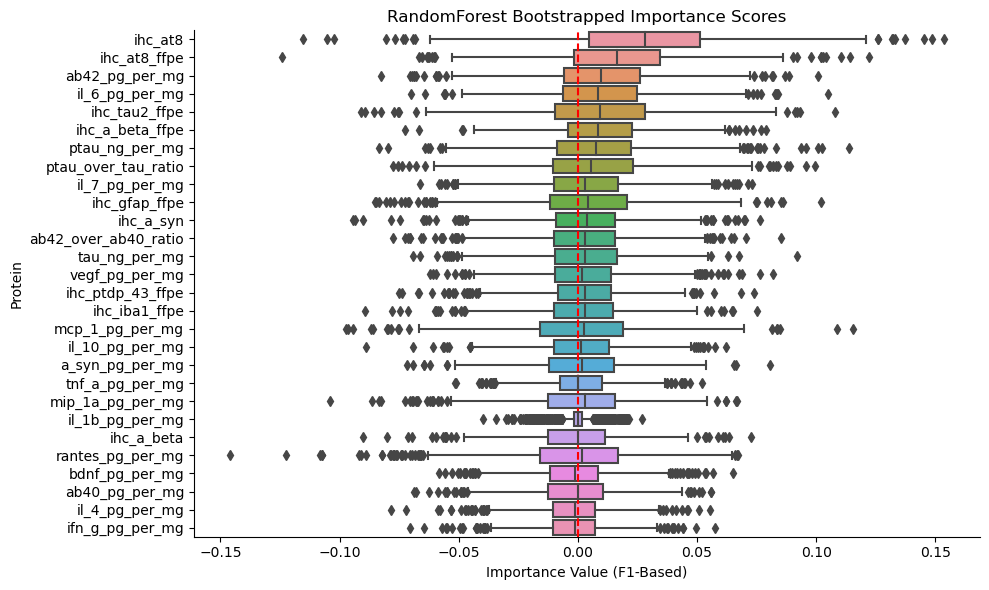

In [28]:
# Code from Camaron Mangham

plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = protein_ids_ranking['protein_id']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('RandomForest Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Protein')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

# GradientBoostingClassifier

In [29]:
# Code from Camaron Mangham

train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(protein_df,donor_ids)
    clf = GradientBoostingClassifier(random_state=42)
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

Training on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [1.0, 1.0, 1.0]
Test Scores (F1):  [0.6494, 0.5652, 0.5116]
mean Train:  1.0
mean Test:  0.602
Training std :  0.0
Testing std :  0.0715


In [30]:
# Code from Camaron Mangham

coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

protein_list = columns_keep_for_training

protein_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(protein_list, coefs_mean)}, orient = 'index', columns= ['importance'])
.rename_axis('protein_id')
.reset_index()
.sort_values(by='importance', ascending= False)
)

sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

protein_ids_ranking
protein_ids_ranking['sem'] = coefs_sem

protein_ids_ranking

,protein_id,importance,sem
3,ihc_at8,0.051103,0.001361
2,ihc_at8_ffpe,0.016720,0.000873
27,ab42_pg_per_mg,0.012691,0.000695
8,ihc_gfap_ffpe,0.012667,0.000895
5,ihc_a_beta_ffpe,0.012080,0.000612
1,ihc_tau2_ffpe,0.011354,0.000848
15,il_6_pg_per_mg,0.011168,0.000810
25,mip_1a_pg_per_mg,0.005837,0.000697
0,ihc_a_syn,0.002325,0.000802
17,ptau_over_tau_ratio,0.001892,0.000585


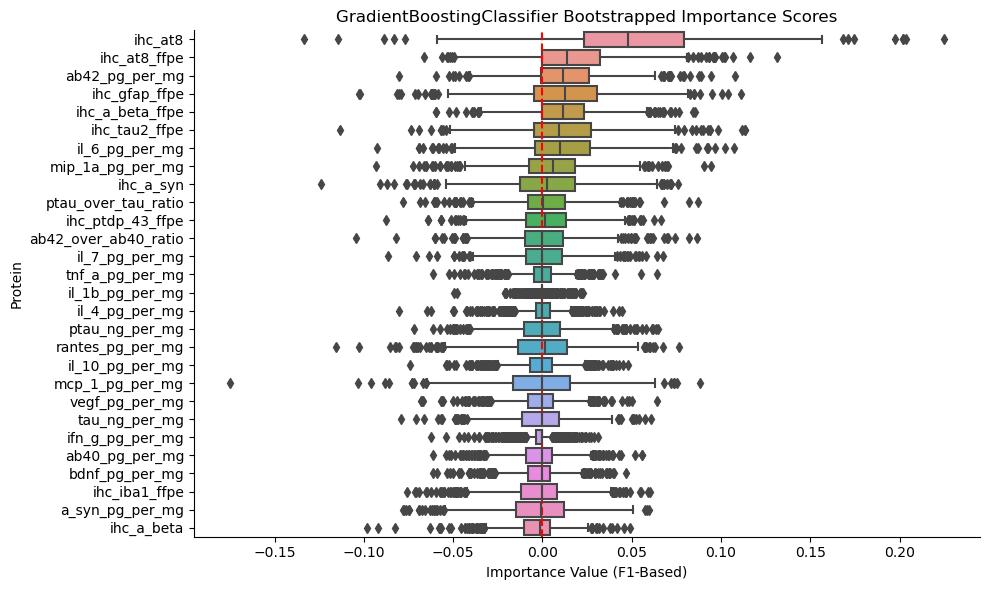

In [31]:
# Code from Camaron Mangham

plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = protein_ids_ranking['protein_id']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('GradientBoostingClassifier Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Protein')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()